In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import matthews_corrcoef

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
recs = pd.DataFrame.from_csv('recs2009_public_clean.csv', index_col=None)
recs.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [4]:
df = recs
cols = list(df)
count = 0
row_count = len(df)

for c in cols:
    dfe = df[df[c].isnull()]
    null_count = len(dfe)
    percent_values = 1 - (null_count / row_count)

    if dfe.empty:
        count += 1
    else:
        print('NaN in ' + c)
        print('Percent not null: ' + str(round(percent_values * 100,2)) + '%')

    if count == len(cols):
        print('No NaN in DataFrame')

No NaN in DataFrame


In [5]:
recs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 569 entries, DOEID to SCALEKER
dtypes: float64(51), int64(518)
memory usage: 52.5 MB


In [6]:
train, test = train_test_split(recs)
X_train = train.drop('TOTALBTU',1)
X_test = test.drop('TOTALBTU',1)
y_train = train.TOTALBTU
y_test = test.TOTALBTU
regr = linear_model.LinearRegression()

In [7]:
%%time
regr.fit(X_train,y_train)

Wall time: 271 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regr.coef_

array([  2.50002776e-17,   4.63281635e-11,   7.17359505e-12,
        -5.42255130e-12,   1.35519374e-11,  -9.99200722e-16,
        -5.82311976e-14,  -1.03916875e-13,   6.04516437e-14,
         1.20500832e-13,  -2.98801230e-12,   5.72511859e-13,
         1.07514923e-11,   2.03524232e-12,   3.94434214e-13,
        -4.86791836e-12,   7.50461840e-13,  -4.43472008e-11,
         1.62250681e-11,  -3.35104751e-12,   1.16388014e-12,
        -1.08270814e-13,   4.90766268e-13,  -9.42522102e-13,
        -7.09290645e-11,   8.84554203e-12,  -5.51497108e-13,
         3.38460931e-12,  -3.82606540e-11,   7.24538826e-12,
        -3.98112363e-14,  -3.12155738e-11,   3.04642328e-11,
        -2.86155767e-10,  -5.40136681e-12,  -5.11453686e-13,
         9.98491177e-12,  -3.63296390e-12,   4.01093341e-11,
        -1.57781295e-11,   2.30072997e-12,   8.22867438e-11,
        -2.50661655e-11,   5.98776249e-12,   7.15104567e-12,
         3.66656206e-10,   4.99316829e-12,   6.96450825e-13,
        -4.48058349e-10,

In [9]:
regr.score(X_train,y_train)

1.0

In [10]:
regr.score(X_test,y_test)

1.0

In [11]:
regr.predict(X_test)

array([  50156.,  115981.,  117973., ...,  119190.,   39746.,  152650.])

In [12]:
matthews_corrcoef(X_train.NWEIGHT,y_train)

ValueError: Can't handle mix of continuous and multiclass

In [15]:
X_train.NWEIGHT = X_train.NWEIGHT.astype(float)
X_train.NWEIGHT

5947      7559.667803
5750      7562.500166
8823     10215.138950
9103      3162.092342
923       8089.881048
11862     7204.748702
4567      7727.971742
582      10576.373350
3878      6466.420268
9199      6267.948926
3765      6356.482316
3869      6980.099049
4846      6540.320528
9954     15506.098550
6240      6904.972468
5728      8236.299166
7874     10651.144490
2482      7016.401706
2129     14682.208310
9073     10423.079730
12033     4224.003952
7957      5639.385347
9952     13109.089280
2788      6297.038661
4391      6297.038661
11216    10135.751490
4631     11437.501050
1682      6991.241210
5707     13667.129250
7905      5067.909327
             ...     
11485    16838.064570
1174      2742.574483
7990      6596.345746
2189     15253.921150
853       9246.646811
7196     10845.193020
11450     4888.333228
4626      7169.306845
7129     14113.312780
6849     24697.794780
9511      5195.342932
10889    16020.976160
1480      2886.607762
8613      6861.287289
10573     

In [18]:
y_train = y_train.astype(float)
y_train

5947      15937.0
5750     131572.0
8823     118693.0
9103      87630.0
923       93088.0
11862     39113.0
4567      21078.0
582       59943.0
3878     107560.0
9199     215230.0
3765     156409.0
3869      39295.0
4846      45103.0
9954     162427.0
6240      45666.0
5728      43135.0
7874      33615.0
2482      34314.0
2129      74564.0
9073     123742.0
12033    214451.0
7957     110523.0
9952     108662.0
2788      34983.0
4391      80844.0
11216    155717.0
4631      48115.0
1682      26293.0
5707      53496.0
7905      84683.0
           ...   
11485     48530.0
1174      99282.0
7990      27064.0
2189      23062.0
853       39476.0
7196     202320.0
11450    131157.0
4626      97267.0
7129     108269.0
6849     120851.0
9511      45097.0
10889    152119.0
1480     109791.0
8613     200678.0
10573    140271.0
6876     166427.0
1615      56706.0
7633      67059.0
2686     114727.0
3907     180232.0
5503     173507.0
10287     41800.0
5305      49719.0
8867      36661.0
1658     1

In [19]:
matthews_corrcoef(X_train.NWEIGHT,y_train)

ValueError: Can't handle mix of continuous and multiclass

In [44]:
X_train.NWEIGHT.value_counts()

15966.070350    14
6297.038661     12
11330.022770    12
14727.348790    12
7169.307206     12
6506.705290     11
16137.471810    11
7489.171687     10
4559.170439     10
10576.371130     9
7264.469778      9
7707.691254      9
7364.810280      9
7169.305346      8
6663.805081      8
10550.899590     8
9242.949773      8
16838.064570     8
8458.371946      8
10128.154510     8
7535.951629      8
7169.305823      8
2778.258809      8
5403.896310      8
5211.538743      7
12046.394360     7
4751.971827      7
2778.258935      7
6297.038285      7
7364.805498      7
                ..
4751.971740      1
8345.546131      1
7385.456383      1
11570.705480     1
14596.795200     1
20104.044610     1
6344.824233      1
4674.747321      1
8016.830852      1
7746.246331      1
2529.176423      1
25256.506550     1
11330.023460     1
5128.659347      1
5956.562570      1
15322.100470     1
9986.586148      1
2913.735321      1
10774.586030     1
13117.070400     1
6189.207129      1
9909.892006 

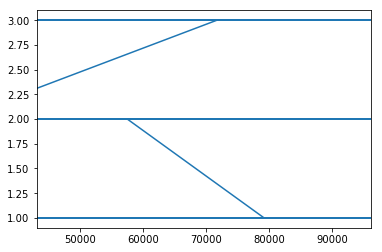

In [37]:
y_train.value_counts().plot()

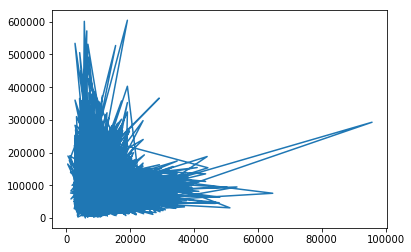

In [43]:
plt.plot(X_train.NWEIGHT,y_train)

In [40]:
len(X_train.NWEIGHT)

9062

In [41]:
len(y_train)

9062

In [45]:
X = X_train.TOTALDOL

In [46]:
matthews_corrcoef(X,y_train)

ValueError: multiclass is not supported

In [47]:
x = [1,2,3]

In [48]:
y = [10,20,25]

In [49]:
matthews_corrcoef(x,y)

ValueError: multiclass is not supported

In [50]:
scipy.stats.pearsonr(x,y)

NameError: name 'scipy' is not defined

In [51]:
np.stats.pearsonr(x.y)

AttributeError: module 'numpy' has no attribute 'stats'